In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style as plt_style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# from imblearn.over_sampling import RandomOverSampler  # 
# from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
# from imblearn.over_sampling import SMOTE,ADASYN

In [2]:
df = pd.read_csv("./../../Dataset/US_Heart_Patients_2.csv")

In [3]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  ...    BMI  \
0              0.0           0.0       0.0            195.0  ...  26.97   
1              0.0           0.0       0.0            250.0  ...  28.73   
2              0.0           0.0       0.0            245.0  ...  25.34   
3              0.0           1.0       0.0            225.0  ...  28.58   
4              0.0           0.0       0.0            285.0  ...  23.10   

   heartRate  glucose  Heart-Att  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0       80.0     77.0          0          NaN          NaN          NaN   
1       95.0     76.0          0          NaN          NaN          NaN   
2       75.0     70.0          0          NaN          NaN          NaN   
3       65.0    103.0          1          NaN          NaN          NaN   
4       85.0     85.0          0          NaN          NaN          NaN   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 22 columns]

In [4]:
cols = df.columns

In [5]:
# Delete all the unnamed columns
for i in range(16, len(cols)):
    df.drop(columns = cols[i], axis = 1, inplace = True)

In [6]:
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [8]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [9]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [10]:
# null value treatment
for col in num:
    val = df[col].mean()
    df[col].fillna(val, inplace = True)

In [11]:
for col in cat:
    val = df[col].mode()[0]
    df[col].fillna(val, inplace = True)

In [12]:
cols = df.columns
for i in range(16, len(cols)):
    df.drop(columns = cols[i], axis = 1, inplace = True)

In [13]:
df[num[0]].mode()[0]

40.0

In [14]:
df

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0       Male  39.0        4.0            0.0         0.0      0.0   
1     Female  46.0        2.0            0.0         0.0      0.0   
2       Male  48.0        1.0            1.0        20.0      0.0   
3     Female  61.0        3.0            1.0        30.0      0.0   
4     Female  46.0        3.0            1.0        23.0      0.0   
...      ...   ...        ...            ...         ...      ...   
4235  Female  48.0        2.0            1.0        20.0      0.0   
4236  Female  44.0        1.0            1.0        15.0      0.0   
4237  Female  52.0        2.0            0.0         0.0      0.0   
4238    Male  40.0        3.0            0.0         0.0      0.0   
4239  Female  39.0        3.0            1.0        30.0      0.0   

      prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0                 0.0           0.0       0.0            195.0        106.0   
1                 0.0           0.0       0.0            250.0        121.0   
2                 0.0           0.0       0.0            245.0        127.5   
3                 0.0           1.0       0.0            225.0        150.0   
4                 0.0           0.0       0.0            285.0        130.0   
...               ...           ...       ...              ...          ...   
4235              0.0           0.0       0.0            248.0        131.0   
4236              0.0           0.0       0.0            210.0        126.5   
4237              0.0           0.0       0.0            269.0        133.5   
4238              0.0           1.0       0.0            185.0        141.0   
4239              0.0           0.0       0.0            196.0        133.0   

      Diastolic BP    BMI  heartRate     glucose  Heart-Att  
0             70.0  26.97       80.0   77.000000          0  
1             81.0  28.73       95.0   76.000000          0  
2             80.0  25.34       75.0   70.000000          0  
3             95.0  28.58       65.0  103.000000          1  
4             84.0  23.10       85.0   85.000000          0  
...            ...    ...        ...         ...        ...  
4235          72.0  22.00       84.0   86.000000          0  
4236          87.0  19.16       86.0   81.951936          0  
4237          83.0  21.47       80.0  107.000000          0  
4238          98.0  25.60       67.0   72.000000          0  
4239          86.0  20.91       85.0   80.000000          0  

[4240 rows x 16 columns]

In [15]:
round(df.describe().T, 2)

count    mean    std     min     25%     50%     75%    max
age              4240.0   49.58   8.57   32.00   42.00   49.00   56.00   70.0
education        4240.0    1.95   1.02    1.00    1.00    2.00    3.00    4.0
currentSmoker    4240.0    0.49   0.50    0.00    0.00    0.00    1.00    1.0
cigsPerDay       4240.0    9.00  11.88    0.00    0.00    0.00   20.00   70.0
BP Meds          4240.0    0.03   0.17    0.00    0.00    0.00    0.00    1.0
prevalentStroke  4240.0    0.01   0.08    0.00    0.00    0.00    0.00    1.0
prevalentHyp     4240.0    0.31   0.46    0.00    0.00    0.00    1.00    1.0
diabetes         4240.0    0.03   0.16    0.00    0.00    0.00    0.00    1.0
tot cholesterol  4240.0  236.68  44.30  107.00  206.00  234.00  262.00  696.0
Systolic BP      4240.0  132.36  22.03   83.50  117.00  128.00  144.00  295.0
Diastolic BP     4240.0   82.90  11.91   48.00   75.00   82.00   89.62  142.5
BMI              4240.0   25.80   4.06   15.54   23.08   25.42   28.02   56.8
heartRate        4240.0   75.87  11.99   44.00   68.00   75.00   83.00  143.0
glucose          4240.0   81.95  22.83   40.00   72.00   80.00   85.00  394.0
Heart-Att        4240.0    0.15   0.36    0.00    0.00    0.00    0.00    1.0

### outlier treatment

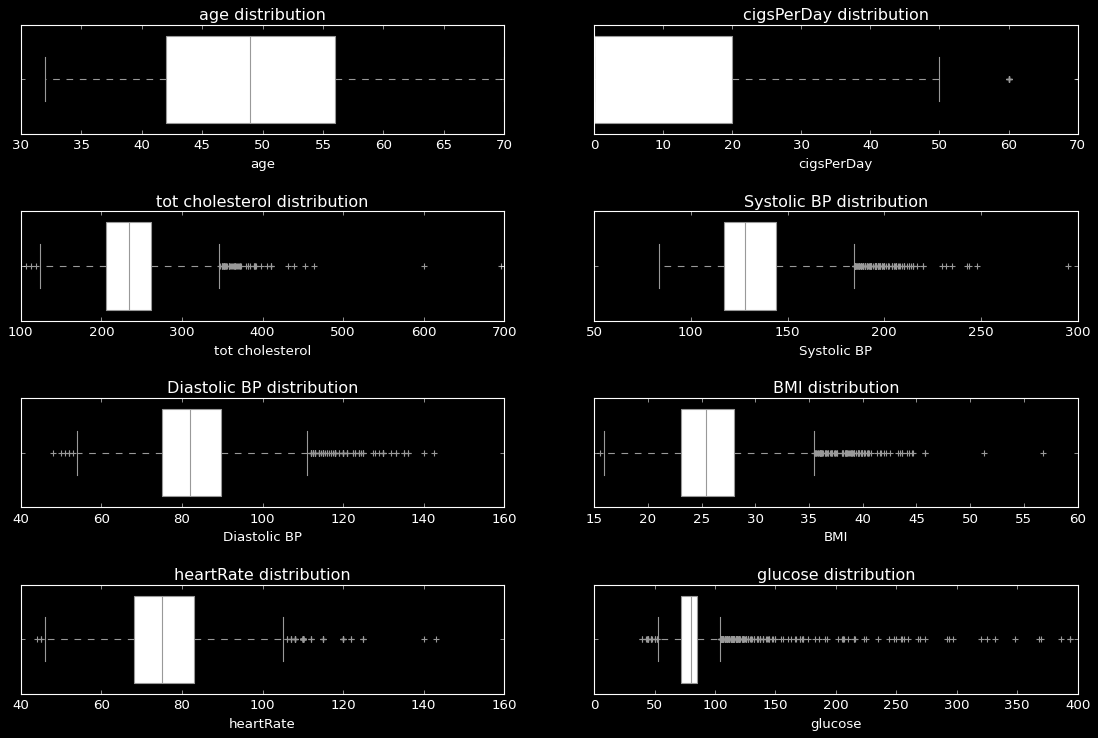

In [16]:
# ------- Box Plot 
plt.style.use("dark_background")
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout(pad=4)

j = 0
for i in range(4):
    a = sns.boxplot(df[num[j]], color="white", ax = axes[i][0], orient = 'h')
    a.set_title(f"{num[j]} distribution")
    b = sns.boxplot(df[num[j + 1]], color="white", ax = axes[i][1], orient = 'h')
    b.set_title(f"{num[j + 1]} distribution")
    j += 2

## Outlier Removing

In [17]:
def ub_and_lb(col):
    sorted(col)
    quartile_1, quartile_3 = np.percentile(col, [25, 75])
    inter_quartile_range = quartile_3 - quartile_1
    upper_bound = quartile_3 + 1.5 * inter_quartile_range
    lower_bound = quartile_1 - 1.5 * inter_quartile_range
    return upper_bound, lower_bound

In [18]:
for col in num:
    ub, lb = ub_and_lb(df[col])
    
    df[col] = np.where(
        df[col] > ub, ub, df[col]
    ) 
    df[col] = np.where(
        df[col] < lb, lb, df[col]
    ) 

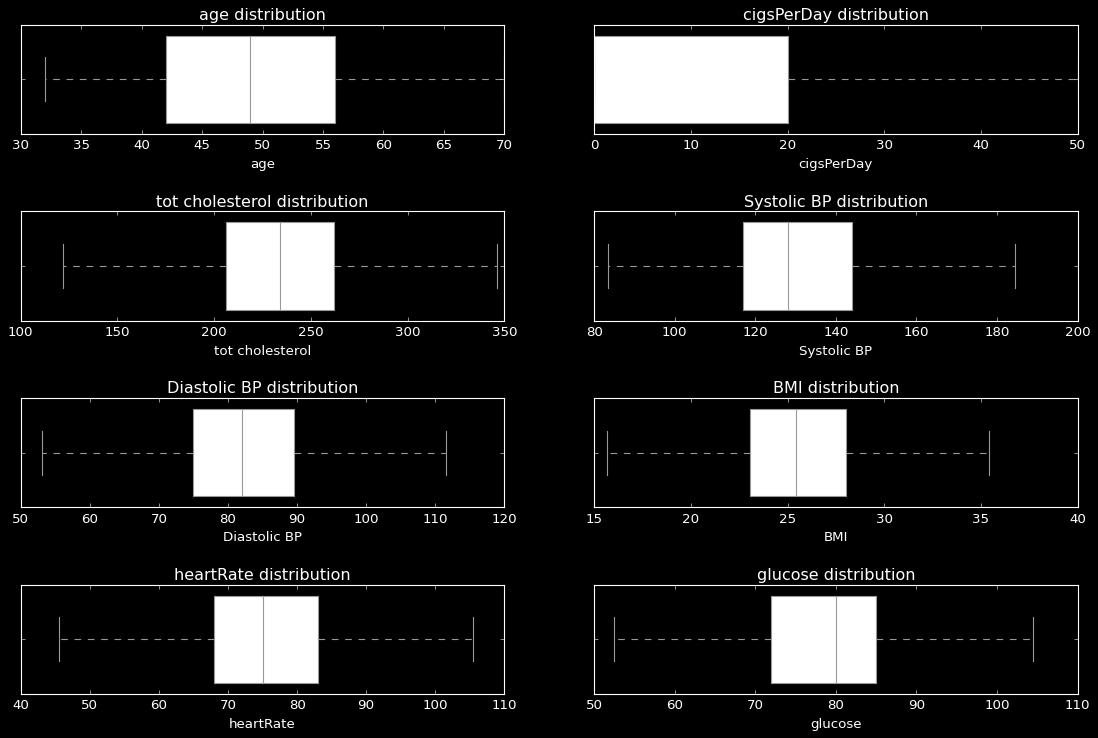

In [19]:

plt.style.use("dark_background")
fig, axes = plt.subplots(nrows = 4, ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.tight_layout(pad=4)

j = 0
for i in range(4):
    a = sns.boxplot(df[num[j]], color="white", ax = axes[i][0], orient = 'h')
    a.set_title(f"{num[j]} distribution")
    b = sns.boxplot(df[num[j + 1]], color="white", ax = axes[i][1], orient = 'h')
    b.set_title(f"{num[j + 1]} distribution")
    j += 2

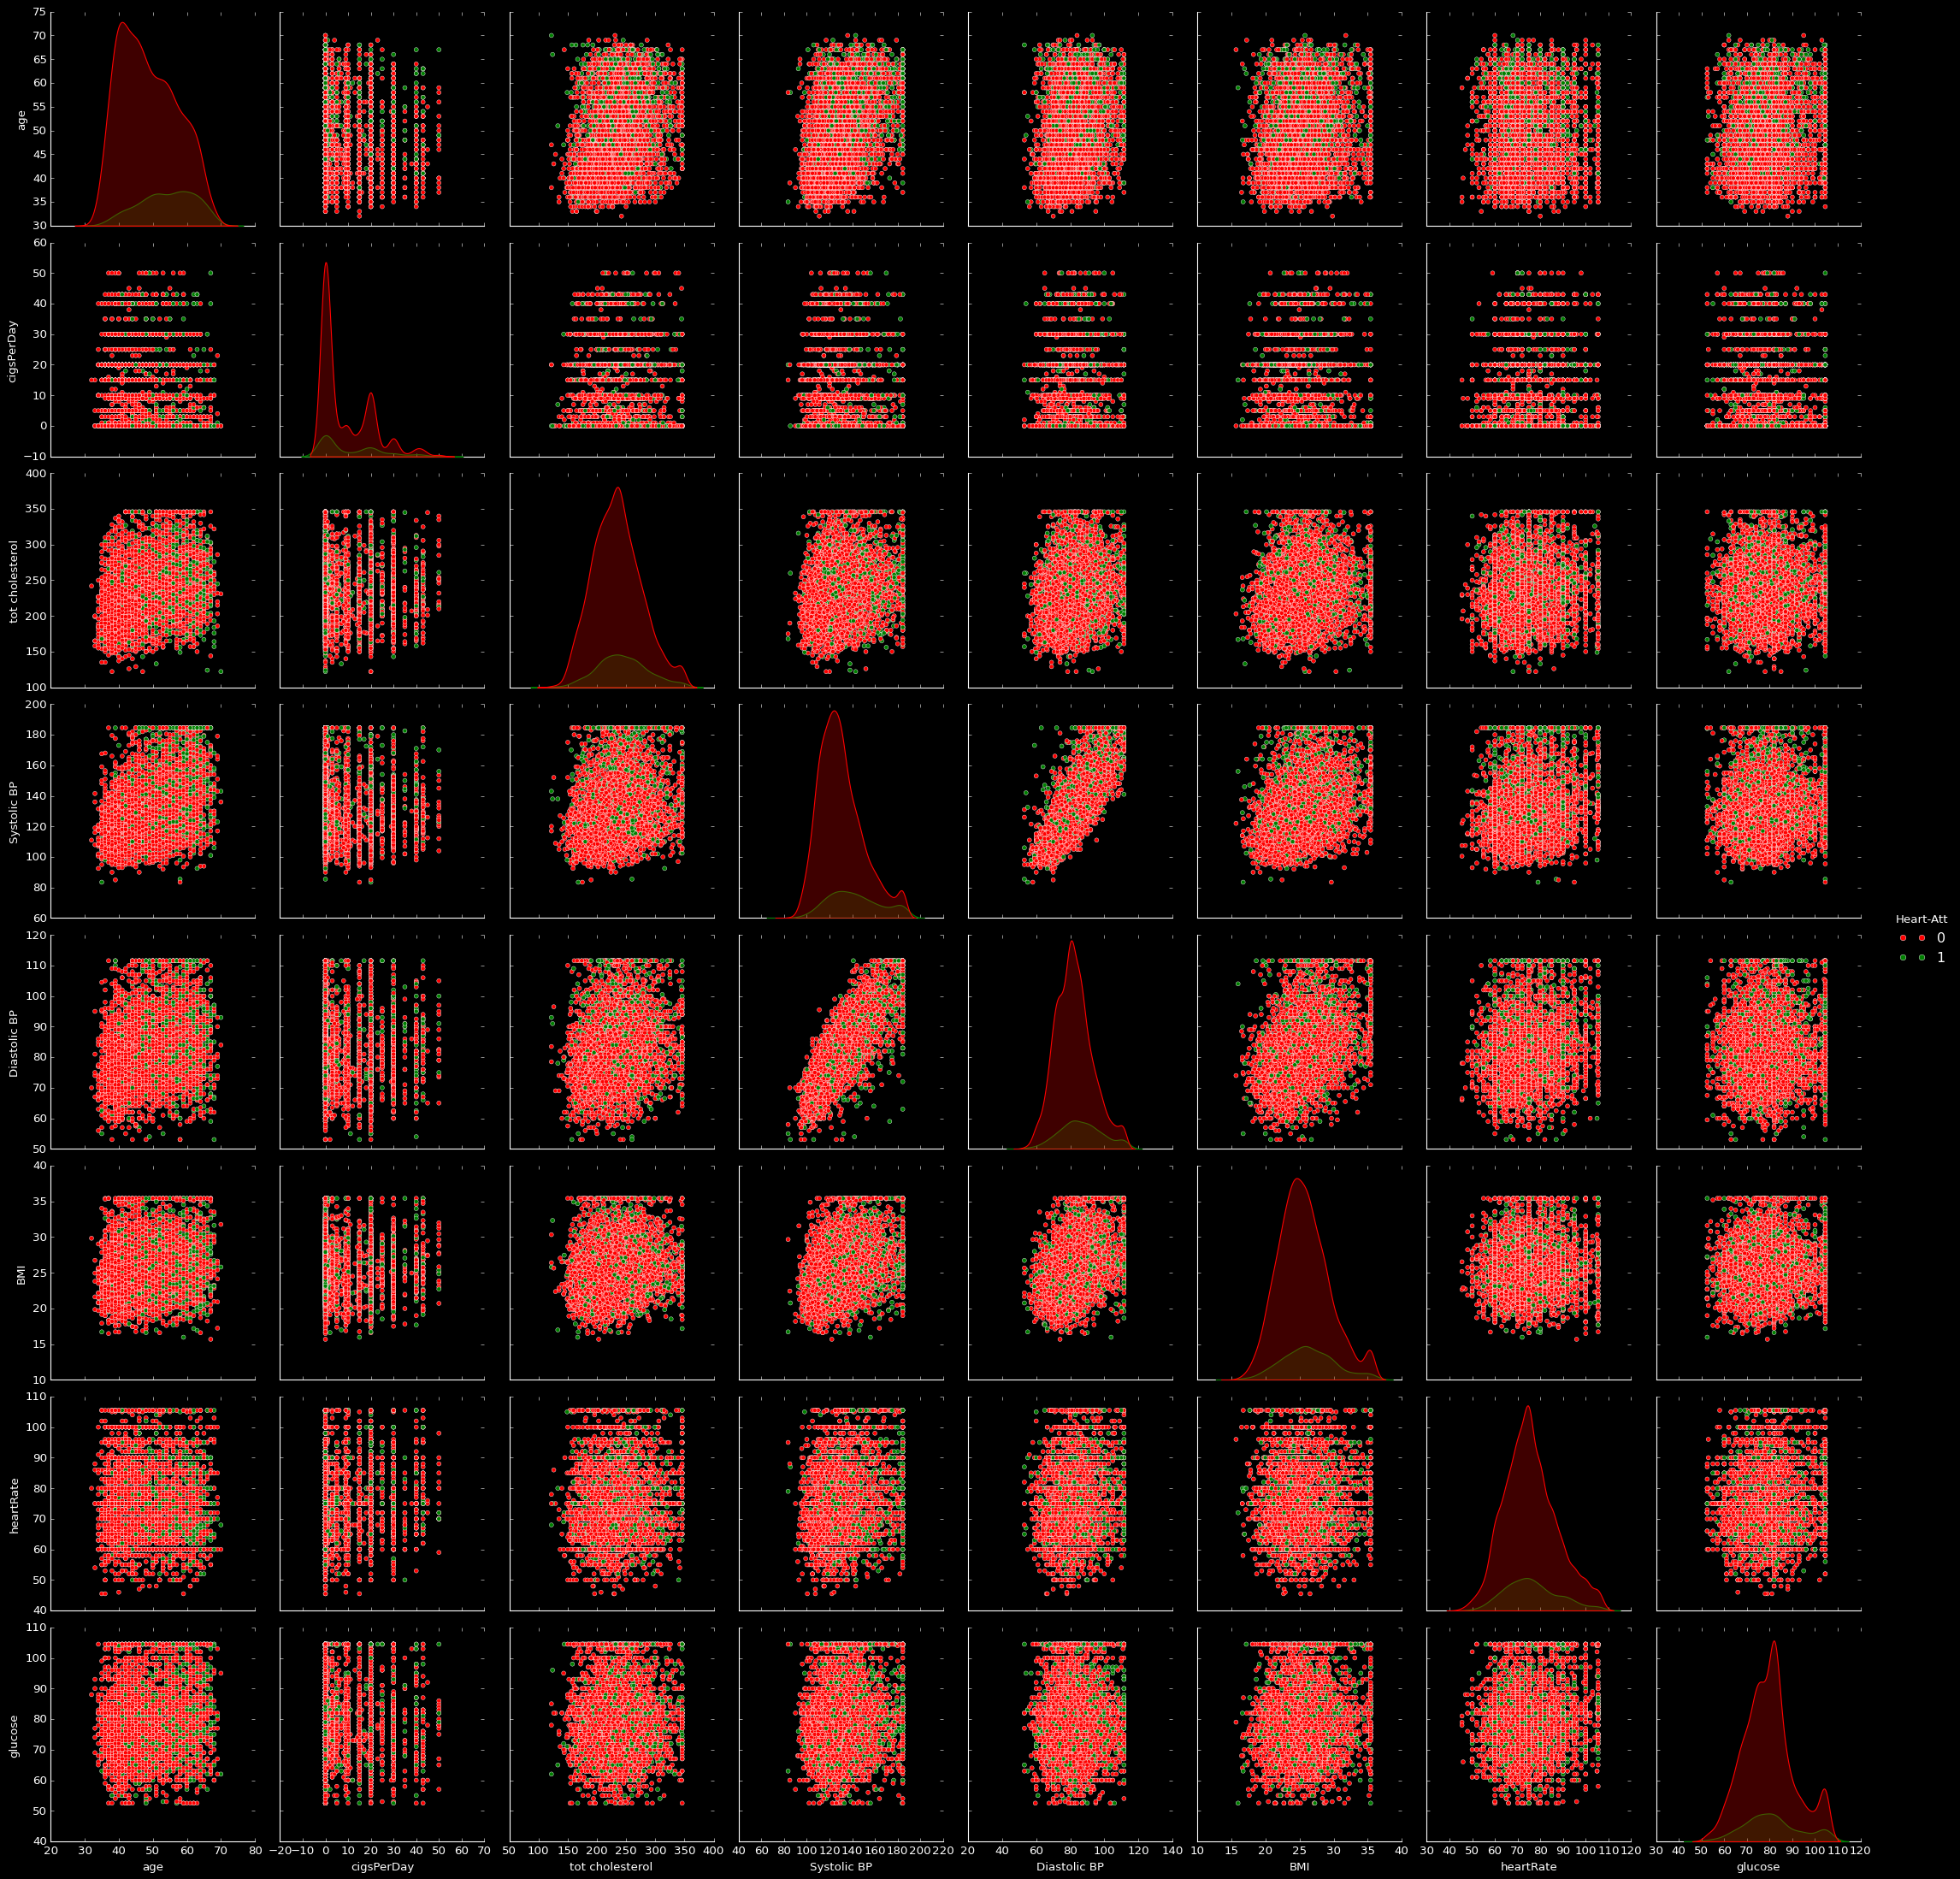

In [20]:
num.append("Heart-Att")

sns.pairplot(df[num],
            height = 3.5,
            aspect = 1,
            hue = 'Heart-Att',
            palette = {'green', 'red'})

In [21]:
# replace male with 0 and female with 1

df["Gender"] = np.where(
    df["Gender"] == "Male", 0, 1
)
# or 
# df["Gender"].replace(to_replace = ["Male", "Female"], value = [0, 1], inplace = True)


<Axes: >

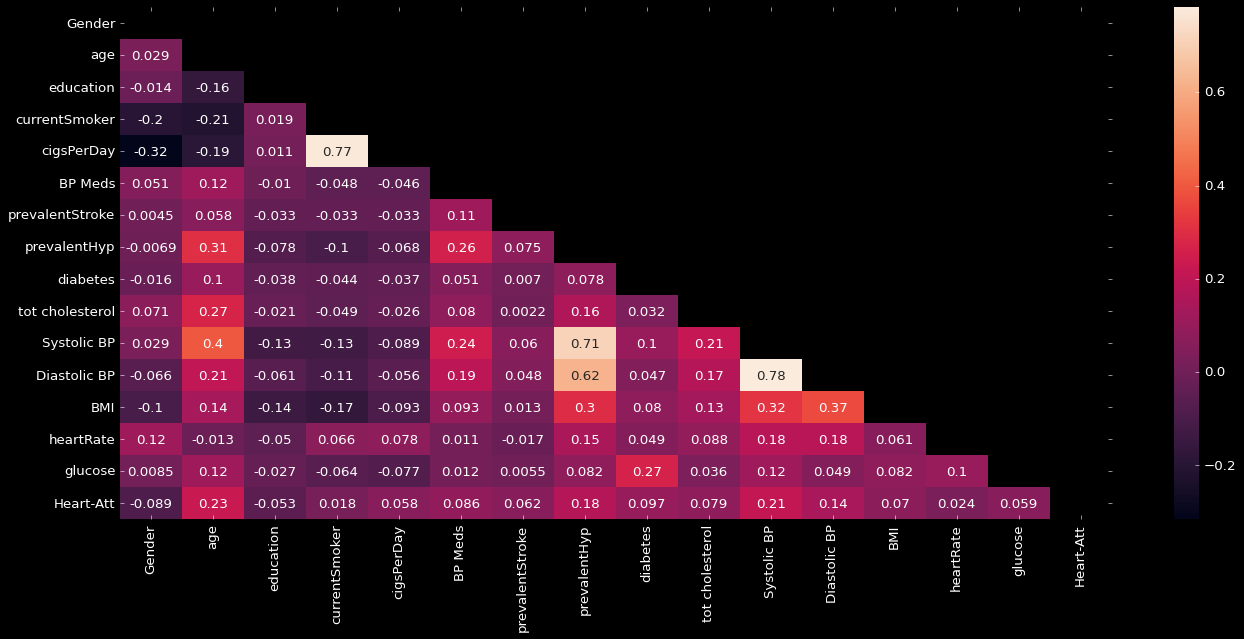

In [22]:
plt.figure(figsize = (20, 8))
corr_matrix = df.corr()
mask_ut = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, annot = True, mask = mask_ut)

##### 1. Logistic Regression

- Logistic regression is defined as a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation. 
- The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.
- Logistic regression uses a logistic function called a sigmoid function to map predictions and their probabilities. 
- The sigmoid function refers to an S-shaped curve that converts any real value to a range between 0 and 1.

> Moreover, if the output of the sigmoid function (estimated probability) is greater than a predefined threshold on the graph, the model predicts that the instance belongs to that class. If the estimated probability is less than the predefined threshold, the model predicts that the instance does not belong to the class.

Sigmoid function :  
$$f(x) = \frac{1}{1 + e^{-x}}$$

<p align="center">
    <img src="./../public/image/sigmoid.png" width=980px>
</p>

In [23]:
original_data = df.copy()

In [24]:
df.drop(columns = ["diabetes", "currentSmoker", "Diastolic BP"], axis = 1, inplace = True)

In [25]:
df.head()

Gender   age  education  cigsPerDay  BP Meds  prevalentStroke  \
0       0  39.0        4.0         0.0      0.0              0.0   
1       1  46.0        2.0         0.0      0.0              0.0   
2       0  48.0        1.0        20.0      0.0              0.0   
3       1  61.0        3.0        30.0      0.0              0.0   
4       1  46.0        3.0        23.0      0.0              0.0   

   prevalentHyp  tot cholesterol  Systolic BP    BMI  heartRate  glucose  \
0           0.0            195.0        106.0  26.97       80.0     77.0   
1           0.0            250.0        121.0  28.73       95.0     76.0   
2           0.0            245.0        127.5  25.34       75.0     70.0   
3           1.0            225.0        150.0  28.58       65.0    103.0   
4           0.0            285.0        130.0  23.10       85.0     85.0   

   Heart-Att  
0          0  
1          0  
2          0  
3          1  
4          0

In [26]:
for col in df.columns:
    df[col] = round(df[col], 2)

### Test Train Splt

In [28]:
X = df.drop(columns = ["Heart-Att"])
Y = df["Heart-Att"]

In [30]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Heart-Att, dtype: int64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [38]:
# Model

model = LogisticRegression()

In [41]:
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
str(round(model.score(x_test, y_test) * 100, 2)) + " %"

'85.22 %'

In [64]:
str(round(model.score(x_train, y_train) * 100, 2)) + " %"

'84.54 %'

## Evaluation metrics

#### Score
$score = \frac{total\_correct}{total\_points}$


#### Confusion matrix

\begin{array}{c|c|c|c}
    \textbf{Actual/Predicted} & \textbf{Predicted: No (0)} & \textbf{Predicted: Yes (1)} & \textbf{Total} \\
    \hline
    \textbf{Actual: No (0)} & TN & FP & TN + FP \\
    \textbf{Actual: Yes (1)} & FN & TP & FN + TP \\
    \hline
    \textbf{Total} & TN + FN & FP + TP & N
\end{array}



\begin{aligned}
    &\text{Where:} \\
    &\quad TN = \text{True Negative (No Heart Attack correctly predicted as No)} \\
    &\quad TP = \text{True Positive (Heart Attack correctly predicted as Yes)} \\
    &\quad FN = \text{False Negative (Heart Attack predicted as No but actually Yes)} \\
    &\quad FP = \text{False Positive (No Heart Attack predicted as Yes)} \\
    &\quad N = \text{Total number of observations (TN + FP + FN + TP)}
\end{aligned}


In [70]:
y_train_predict = model.predict(x_train) 

In [71]:
# confusion matrix

metrics.confusion_matrix(y_train, y_train_predict)

array([[2505,    6],
       [ 453,    4]], dtype=int64)

TypeError: descriptor '__hash__' of 'object' object needs an argument